In [1]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.dates as md
import matplotlib
from sklearn.model_selection import train_test_split

Load CSV files

In [2]:
#S&P500
stock_data_sp500 = pd.read_csv("project_data/indexes/^SP500.Last.txt", delimiter = ';', names = ["Effective_date", "Open", "High", "Low", "Close", "0"])
stock_data_sp500.to_csv('project_data/indexes/^SP500.csv', index=None)

#^NDX(NASDAQ)
stock_data_ndx = pd.read_csv("project_data/indexes/^NDX.Last.txt", delimiter = ';', names = ["Effective_date", "Open", "High", "Low", "Close", "0"])
stock_data_ndx.to_csv('project_data/indexes/^NDX.csv', index=None)

#^DIJA(Dow Jones)
stock_data_djia = pd.read_csv("project_data/indexes/^DJIA.Last.txt", delimiter = ';', names = ["Effective_date", "Open", "High", "Low", "Close", "0"])
stock_data_djia.to_csv('project_data/indexes/^DJIA.csv', index=None)


In [3]:
# Read S&P500 CSV and turn into dataframe
cleaned_sp500 = stock_data_sp500[['Effective_date', 'Close']]
cleaned_sp500 = pd.DataFrame(cleaned_sp500)
cleaned_sp500['sp500_ticks'] = range(0, len(cleaned_sp500.index.values))
cleaned_sp500.set_index('Effective_date')

# Read NASDAQ CSV and turn into dataframe
cleaned_ndx = stock_data_ndx[['Effective_date', 'Close']]
cleaned_ndx = pd.DataFrame(cleaned_ndx)
cleaned_ndx['ndx_ticks'] = range(0, len(cleaned_ndx.index.values))
cleaned_ndx.set_index('Effective_date')

# Read Dow Jones CSV and turn into dataframe
cleaned_djia = stock_data_djia[['Effective_date', 'Close']]
cleaned_djia = pd.DataFrame(cleaned_djia)
cleaned_djia['djia_ticks'] = range(0, len(cleaned_djia.index.values))
cleaned_djia.set_index('Effective_date')


cleaned_sp500.head()

,Effective_date,Close,sp500_ticks
0,20200203,3248.92,0
1,20200204,3297.59,1
2,20200205,3334.69,2
3,20200206,3345.78,3
4,20200207,3327.71,4


Generate a line plot of year versus stock index and Linear Regression to predict future tick.

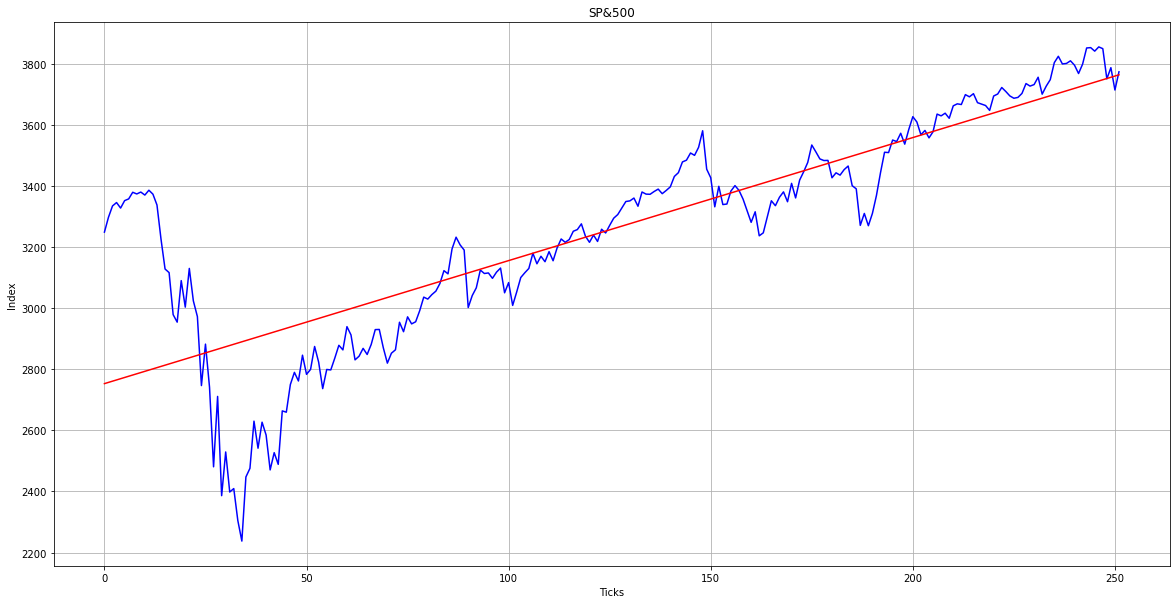

In [4]:
#Linear Regression for SP&500

plt.figure(figsize=(20,10))
sp500_index_value = cleaned_sp500.iloc[:,1]
sp500_ticks = cleaned_sp500.iloc[:,2]
plt.plot(sp500_ticks, sp500_index_value, c='b')
#plt.plot(sp500_ticks,cleaned_sp500['Moving_Average'], c='r')

plt.xlabel('Ticks')
plt.ylabel('Index')
plt.title('SP&500')
plt.grid()

# Perform a linear regression on year versus stock index
st_slope, st_int, st_r, st_p, st_std_err = stats.linregress(sp500_ticks, sp500_index_value)
st_fit = st_slope * sp500_ticks + st_int
plt.plot(sp500_ticks,st_fit, c='r')
plt.savefig("S&P500-LinearRegression.png")
plt.show()

In [5]:
#Choose aproximately 21 ticks in the future to find out that index price value
ticks = 271
print(f"Using Linear Regression, the stock_index value at the 271st tick mark is {round(st_slope * ticks + st_int,2)}.")

Using Linear Regression, the stock_index value at the 271st tick mark is 3844.53.


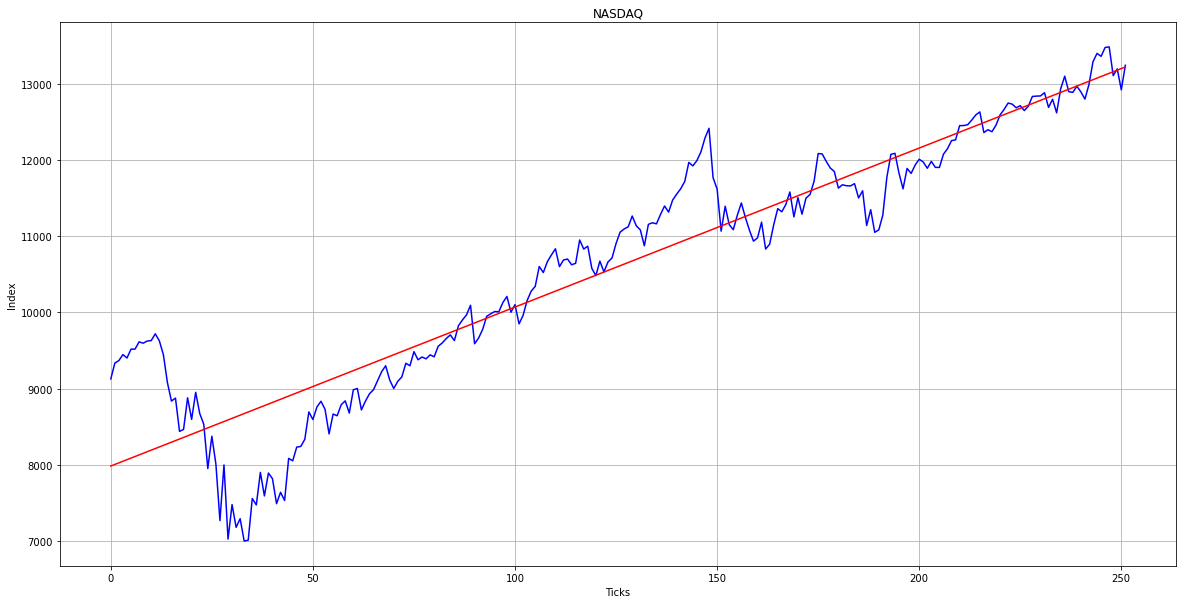

In [6]:
#Linear Regression for NASDAQ

plt.figure(figsize=(20,10))
nasdaq_index_value = cleaned_ndx.iloc[:,1]
nasdaq_ticks = cleaned_ndx.iloc[:,2]
plt.plot(nasdaq_ticks, nasdaq_index_value, c='b')
#plt.xticks(rotation=90)

plt.xlabel('Ticks')
plt.ylabel('Index')
plt.title('NASDAQ')
plt.grid()

# Perform a linear regression on year versus stock index
nd_slope, nd_int, nd_r, nd_p, nd_std_err = stats.linregress(nasdaq_ticks, nasdaq_index_value)
nd_fit = nd_slope * nasdaq_ticks + nd_int
plt.plot(nasdaq_ticks, nd_fit, c='r')
plt.savefig("NASDAQ-LinearRegression.png")
plt.show()

In [7]:
ticks1 = 271
print(f"U sing Linear Regression, the NASDAQ value at the 271st tick mark is {round(nd_slope * ticks1 + nd_int,2)}.")

U sing Linear Regression, the NASDAQ value at the 271st tick mark is 13644.47.


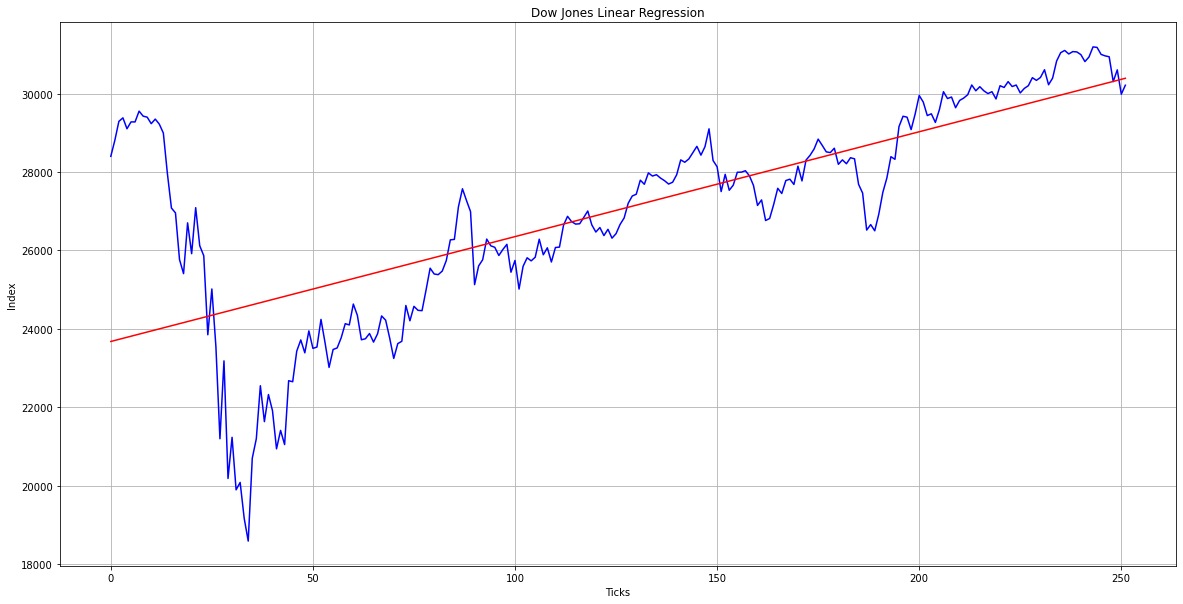

In [8]:
#Linear Regression for Dow Jones

plt.figure(figsize=(20,10))
djia_index_value = cleaned_djia.iloc[:,1]
djia_ticks = cleaned_djia.iloc[:,2]
plt.plot(djia_ticks, djia_index_value, c='b')

plt.xlabel('Ticks')
plt.ylabel('Index')
plt.title("Dow Jones Linear Regression")
plt.grid()

# Perform a linear regression on year versus stock index
dj_slope, dj_int, dj_r, dj_p, dj_std_err = stats.linregress(djia_ticks , djia_index_value)
dj_fit = dj_slope * djia_ticks + dj_int
plt.plot(djia_ticks, dj_fit, c='r')
plt.savefig("Dow Jones-LinearRegression.png")
plt.show()

In [9]:
ticks2 = 271
print(f"Using Linear Regression, the Dow Jones value at the 271st tick mark is {round(dj_slope * ticks2 + dj_int,2)}.")

Using Linear Regression, the Dow Jones value at the 271st tick mark is 30923.32.


Make prediction using Polynomial Regression

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

pre_process = PolynomialFeatures(degree = 3)

[3588.79515396]


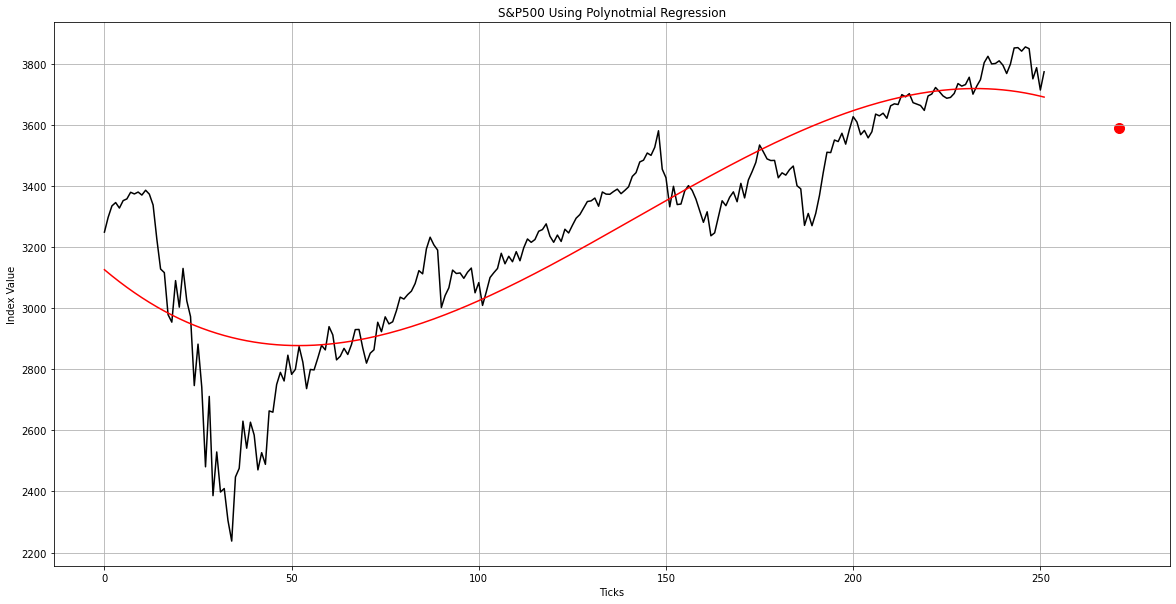

In [11]:
#Plot S&P500 and plot prediction using Polynomial Regression

x = cleaned_sp500[['sp500_ticks']]
y = cleaned_sp500['Close']
cleaned_sp500 = cleaned_sp500.dropna()
x_poly = pre_process.fit_transform(x)
x_poly

pr_model = LinearRegression()
pr_model.fit(x_poly, y)
y_pred = pr_model.predict(x_poly)

plt.figure(figsize=(20,10))
plt.plot(x, y, c='black', )
plt.xlabel('Ticks')
plt.ylabel('Index Value')
plt.title('S&P500 Using Polynotmial Regression')
plt.plot(x, y_pred, c='r')


theta0 = pr_model.intercept_
_, theta1, theta2, theta3 = pr_model.coef_

theta0, theta1, theta2, theta3

poly_prediction = pr_model.predict(pre_process.fit_transform([[271]]))

plt.scatter(271, poly_prediction, c='r', s=100)
print(poly_prediction)
plt.savefig("S&P500-PolynomialRegression.png")
plt.grid()

#min-max scaler - fits numbers from 0-1 

In [12]:
'''
Mean Squared Error: Measures the quality of the model. When making
a prediction, MSE can determine how close the prediction matches to the actual data.
'''
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

#Try both StandardScaler() and MinMaxScaler and determine which has a lower MSE 

In [13]:
#Create dataframe for actual variables and predicted variables
#Use for reference:
#   x = cleaned_sp500[['sp500_ticks']]
#   y = cleaned_sp500['Close']

y_df = pd.DataFrame(y)
y_pred_df = pd.DataFrame(y_pred)

In [14]:
#Min_max Scaler for y
data1 = y_df
scaler = MinMaxScaler()
scaler.fit(data1)
scaled_features = scaler.transform(data1)
y_df_MinMax = pd.DataFrame(data=scaled_features)
d = y_df_MinMax.iloc[:,0]

#Min_max Scaler for y_pred
data2 = y_pred_df
scaler2 = MinMaxScaler()
scaler2.fit(data2)
scaled_features2 = scaler2.transform(data2)
y_pred_df_MinMax = pd.DataFrame(data=scaled_features2)
a= y_pred_df_MinMax.iloc[:,0]

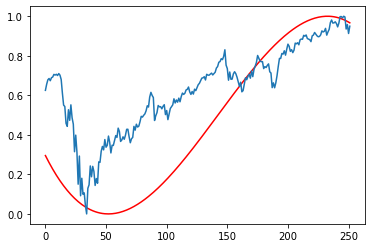

In [15]:
#Visualization using MinMaxScaler
plt.plot(a, c='r')
plt.plot(d)

In [16]:
#MSE Calculation
mean_squared_error(d,a)

0.07448992898870029

In [17]:
st_x = StandardScaler()
st_x = st_x.fit_transform(data1)
#Convert to table format - StandardScaler 
st_x = pd.DataFrame(data=st_x)
st_x_actual = st_x.iloc[:,0]

st_x2 = StandardScaler()
st_x2 = st_x2.fit_transform(data2)
#Convert to table format - StandardScaler 
st_x2 = pd.DataFrame(data=st_x2)
st_x2_pred = st_x2.iloc[:,0]

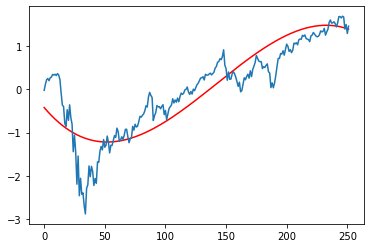

In [18]:
#Visualization using StandardScaler
plt.plot(st_x2_pred, c='r')
plt.plot(st_x_actual)

In [19]:
#MSE Calculation
mean_squared_error(st_x_actual,st_x2_pred)

0.23877060063215536

y = a + bx + cx^2 + dx^3

[12570.19984547]


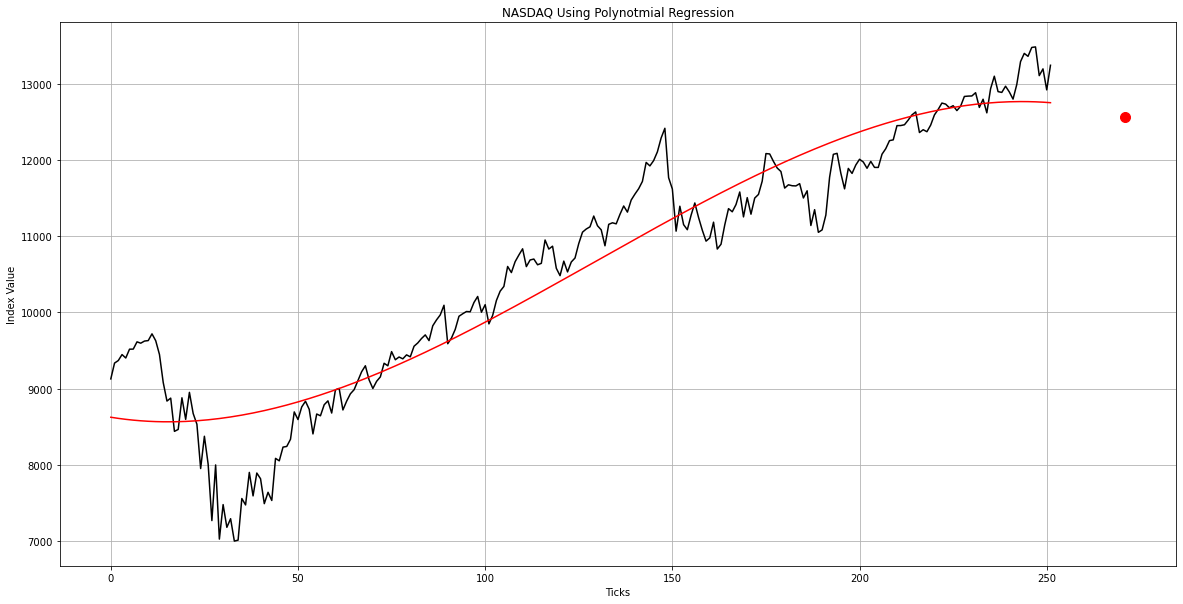

In [20]:
#Plot NASDAQ and make prediction using Polynomial Regression

z = cleaned_ndx[['ndx_ticks']]
n = cleaned_ndx['Close']
cleaned_ndx = cleaned_ndx.dropna()
z_poly1 = pre_process.fit_transform(z)
z_poly1

pr_model = LinearRegression()
pr_model.fit(z_poly1, n)
n_pred = pr_model.predict(z_poly1)

plt.figure(figsize=(20,10))
plt.plot(z, n, c='black', )
plt.xlabel('Ticks')
plt.ylabel('Index Value')
plt.title('NASDAQ Using Polynotmial Regression')
plt.plot(z, n_pred, c='r')

theta0 = pr_model.intercept_
_, theta1, theta2, theta3 = pr_model.coef_

theta0, theta1, theta2, theta3 

poly_prediction1 = pr_model.predict(pre_process.fit_transform([[271]]))

plt.scatter(271, poly_prediction1, c='r', s=100)
print(poly_prediction1)
plt.savefig("NASDAQ-PolynomialRegression.png")
plt.grid()

In [21]:
#Create dataframe for actual variables and predicted variables
#Use as a reference:
#z = cleaned_ndx[['ndx_ticks']]
#n = cleaned_ndx['Close']

n_df = pd.DataFrame(n)
n_pred_df = pd.DataFrame(n_pred)

In [22]:
#Min_max Scaler for n
data3 = n_df
scaler3 = MinMaxScaler()
scaler3.fit(data3)
scaled_features3 = scaler3.transform(data3)
n_df_MinMax = pd.DataFrame(data=scaled_features3)
d2 = n_df_MinMax.iloc[:,0]

#Min_max Scaler for n_pred
data4 = n_pred_df
scaler4 = MinMaxScaler()
scaler4.fit(data4)
scaled_features4 = scaler4.transform(data4)
n_pred_df_MinMax = pd.DataFrame(scaled_features4)
a2 = n_pred_df_MinMax.iloc[:,0]

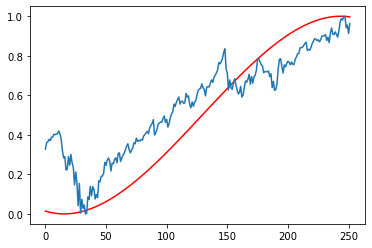

In [23]:
#MinMaxScaler Visualization
plt.plot(a2, c='r')
plt.plot(d2)

In [24]:
#MSE Calculation
mean_squared_error(d2,a2)

0.028403055376848525

In [25]:
#Standardization Scaling Method
st_x3 = StandardScaler()
st_x3 = st_x3.fit_transform(data3)
#Convert to table format - StandardScaler 
st_x3 = pd.DataFrame(data=st_x3)
st_x3_actual = st_x3.iloc[:,0]

st_x4 = StandardScaler()
st_x4 = st_x4.fit_transform(data4)
#Convert to table format - StandardScaler 
st_x4 = pd.DataFrame(data=st_x4)
st_x4_pred = st_x4.iloc[:,0]

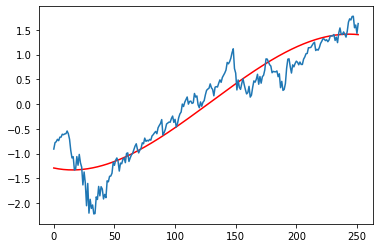

In [26]:
#Visualize StandardScaler
plt.plot(st_x4_pred, c='r')
plt.plot(st_x3_actual)

In [27]:
#MSE Calulcation
mean_squared_error(st_x3_actual,st_x4_pred)

0.11331082513353147

[28641.62628323]


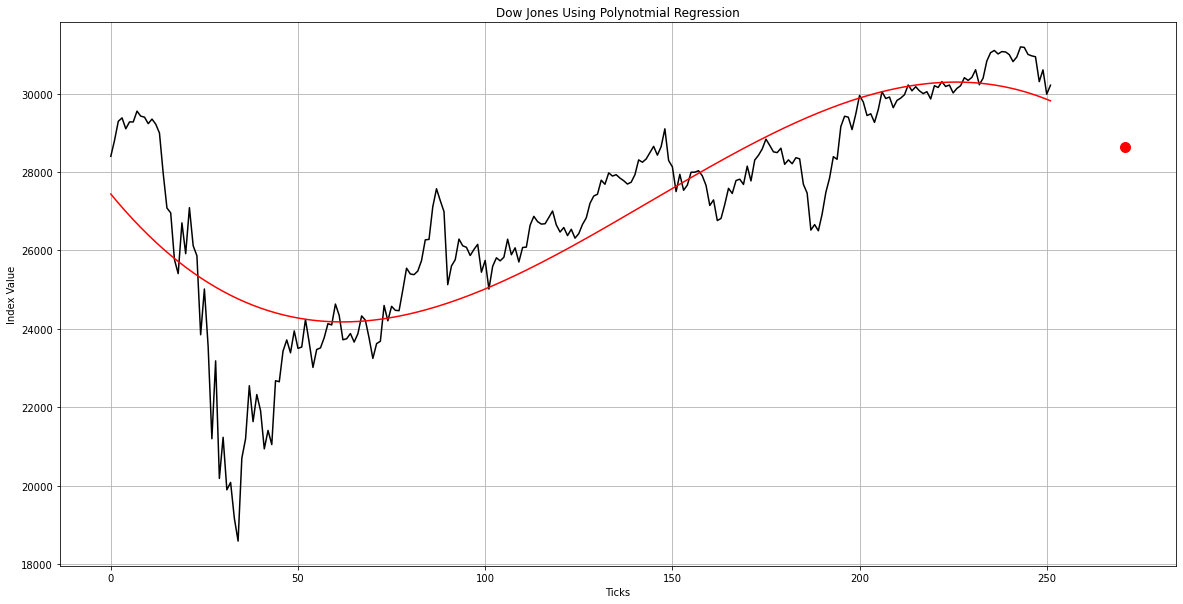

In [28]:
#Plot Dow Jones and make prediction using Polynomial Regression
pre_process = PolynomialFeatures(degree = 3)

p = cleaned_djia[['djia_ticks']]
q = cleaned_djia['Close']
cleaned_djia = cleaned_djia.dropna()
p_poly2 = pre_process.fit_transform(p)
p_poly2

pr_model = LinearRegression()
pr_model.fit(p_poly2, q)
q_pred = pr_model.predict(p_poly2)


plt.figure(figsize=(20,10))
plt.plot(p, q, c='black' )
plt.xlabel('Ticks')
plt.ylabel('Index Value')
plt.title('Dow Jones Using Polynotmial Regression')
plt.plot(p, q_pred, c='r')


theta0 = pr_model.intercept_
_, theta1, theta2, theta3 = pr_model.coef_

theta0, theta1, theta2, theta3

poly_prediction2 = pr_model.predict(pre_process.fit_transform([[271]]))

plt.scatter(271, poly_prediction2, c='r', s=100)
print(poly_prediction2)
plt.savefig("Dow Jones-PolynomialRegression.png")
plt.grid()

In [29]:
#Create dataframe for actual variables and predicted variables
#Use as a reference:
#p = cleaned_djia[['djia_ticks']]
#q = cleaned_djia['Close']

q_df = pd.DataFrame(q)
q_pred_df = pd.DataFrame(q_pred)

In [30]:
#Min_max Scaler for q
data5 = q_df
scaler5 = MinMaxScaler()
scaler5.fit(data5)
scaled_features5 = scaler5.transform(data5)
q_df_MinMax = pd.DataFrame(data=scaled_features5)
d3 = q_df_MinMax.iloc[:,0]

#Min_max Scaler for q_pred
data6 = q_pred_df
scaler6 = MinMaxScaler()
scaler6.fit(data6)
scaled_features6 = scaler6.transform(data6)
q_pred_df_MinMax = pd.DataFrame(scaled_features6)
a3 = q_pred_df_MinMax.iloc[:,0]

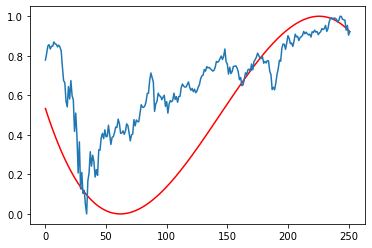

In [31]:
#Visualization
plt.plot(a3, c='r')
plt.plot(d3)

In [32]:
#MSE calculation
mean_squared_error(d3,a3)

0.09066357907392168

In [33]:
#Standardization Scaling Method 
st_x5 = StandardScaler()
st_x5 = st_x5.fit_transform(data5)
#Convert to table format - StandardScaler 
st_x5 = pd.DataFrame(data=st_x5)
st_x5_actual = st_x5.iloc[:,0]

st_x6 = StandardScaler()
st_x6 = st_x6.fit_transform(data6)
#Convert to table format - StandardScaler 
st_x6 = pd.DataFrame(data=st_x6)
st_x6_pred = st_x6.iloc[:,0]

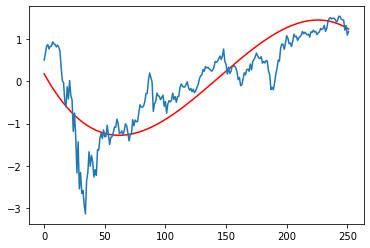

In [34]:
#Visualization
plt.plot(st_x6_pred, c='r')
plt.plot(st_x5_actual)

In [35]:
#MSE Calculation
mean_squared_error(st_x5_actual,st_x6_pred)

0.33529490229360204

Train, Test, Split Data and Compare Accuracies

In [36]:
#Test Variables for S&P500
yy = cleaned_sp500.Close

xx = cleaned_sp500.drop('Close', axis=1)

In [37]:
#Train_test_split
x_train, x_test, y_train, y_test = train_test_split(xx, yy, test_size=0.2, random_state=0)

In [38]:
print("shape of original dataset :", cleaned_sp500.shape)
print("shape of input - training set", x_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", x_test.shape)
print("shape of output - testing set", y_test.shape)

shape of original dataset : (252, 3)
shape of input - training set (201, 2)
shape of output - training set (201,)
shape of input - testing set (51, 2)
shape of output - testing set (51,)


In [39]:
lr = LinearRegression()

lr.fit(x_train,y_train)

LinearRegression()

In [40]:
lr.predict(x_test)

array([3382.94792318, 3083.195105  , 3431.23953915, 3154.68131017,
       3351.15572542, 3547.02241755, 3222.84194879, 3658.8720063 ,
       3003.13771401, 3290.96735708, 3347.18720543, 3756.8818905 ,
       3187.09003862, 3502.72574431, 3363.08770811, 3042.85814416,
       3570.86876777, 3435.20805913, 3378.9794032 , 3138.80723024,
       3498.75722433, 2931.00855541, 3784.67914553, 3302.89053219,
       3191.05855861, 3832.9707615 , 2782.7905258 , 2970.73779314,
       3535.11685761, 2898.61744212, 3812.50282332, 3255.23306208,
       3195.04469375, 3478.89700926, 3423.28488402, 3330.68778723,
       3494.78870435, 2770.88496586, 2839.0367969 , 3511.28812255,
       3250.63920383, 2798.69102848, 3566.88263263, 3463.00531417,
       3110.99236004, 3267.13862203, 3780.71062555, 2927.04003543,
       3007.106234  , 3474.92848927, 3034.90348903])

In [41]:
#Linear Regression Accuracy
lr.score(x_test,y_test)

0.6315514967758843

In [42]:
#Change degree to determine different accuracies
polynomial_reg_test = PolynomialFeatures(degree=3)

In [43]:
poly_transform = polynomial_reg_test.fit_transform(xx)
lr.fit(poly_transform,yy)

#Test
p_pred = lr.predict(polynomial_reg_test.fit_transform(x_test))

In [44]:
print('Polynomial Regression Accuracy', lr.score(polynomial_reg_test.fit_transform(x_test),y_test))

Polynomial Regression Accuracy 0.7805517344966713


In [45]:
#Test Variables for NASDAQ
yy2 = cleaned_ndx.Close

xx2 = cleaned_ndx.drop('Close', axis=1)

In [46]:
#Train_Test_Split
x_train, x_test, y_train, y_test = train_test_split(xx2, yy2, test_size=0.2, random_state=0)

In [47]:
print("shape of original dataset :", cleaned_sp500.shape)
print("shape of input - training set", x_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", x_test.shape)
print("shape of output - testing set", y_test.shape)

shape of original dataset : (252, 3)
shape of input - training set (201, 2)
shape of output - training set (201,)
shape of input - testing set (51, 2)
shape of output - testing set (51,)


In [48]:
lr2 = LinearRegression()

lr2.fit(x_train,y_train)

LinearRegression()

In [49]:
lr2.predict(x_test)

array([11287.81788685,  9692.88792498, 11542.98262007, 10075.70413528,
       11117.67884207, 12159.69770277, 10437.20585147, 12755.14244529,
        9267.58222725, 10798.71012731, 11096.41106153, 12855.80213069,
       10245.79838624, 11925.79883037, 11181.48026396,  9480.25747303,
       12287.30182638, 11564.25040061, 11266.55010631,  9990.63301311,
       11904.53104982,  8884.81273051, 13004.67531466, 10862.51218912,
       10267.06616678, 13259.84004788,  8098.00531658,  9097.48733638,
       12095.89436115,  8714.71719973, 13153.5465789 , 10607.30138225,
       10288.3326675 , 11798.19342693, 11500.44833881, 11011.38537309,
       11883.26326928,  8034.20197496,  8395.70433106, 11968.28895771,
       10586.07903545,  8183.07451902, 12266.03532566, 11713.12358459,
        9841.76110896, 10671.10472388, 12983.40753412,  8863.54494997,
        9288.85000779, 11776.92564639,  9437.72319177])

In [50]:
#Accuracy Using Linear Regression
lr2.score(x_test,y_test)

0.8391311357889912

In [51]:
polynomial_reg_test2 = PolynomialFeatures(degree=3)

In [52]:
poly_transform2 = polynomial_reg_test2.fit_transform(xx2)
lr2.fit(poly_transform2,yy2)

#Test
p_pred2 = lr2.predict(polynomial_reg_test2.fit_transform(x_test))

In [53]:
print('Polynomial Regression Accuracy', lr2.score(polynomial_reg_test2.fit_transform(x_test),y_test))

Polynomial Regression Accuracy 0.8752127033606754


In [54]:
#Test Variables for Dow Jones
yy3 = cleaned_djia.Close

xx3 = cleaned_djia.drop('Close', axis=1)

In [55]:
x_train, x_test, y_train, y_test = train_test_split(xx3, yy3, test_size=0.2, random_state=0)

In [56]:
print("shape of original dataset :", cleaned_sp500.shape)
print("shape of input - training set", x_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", x_test.shape)
print("shape of output - testing set", y_test.shape)

shape of original dataset : (252, 3)
shape of input - training set (201, 2)
shape of output - training set (201,)
shape of input - testing set (51, 2)
shape of output - testing set (51,)


In [57]:
lr3 = LinearRegression()

lr3.fit(x_train,y_train)

LinearRegression()

In [58]:
lr3.predict(x_test)

array([27840.53003728, 25870.29814561, 28159.1226615 , 26338.54888174,
       27632.21036628, 28919.71411181, 26787.33014501, 29654.67835024,
       25343.65357817, 27235.7544379 , 27606.22618403, 30576.62728708,
       26553.11553435, 28627.37339763, 27710.43064083, 25603.85237109,
       29075.97617571, 28185.10684375, 27814.54585503, 26234.61215272,
       28601.38921537, 24868.88813265, 30758.69504804, 27313.88546985,
       26579.0997166 , 31077.28767226, 23893.46230195, 25129.17616816,
       28841.76156505, 24654.49996523, 30941.03053679, 27001.71831243,
       26605.26238404, 28471.28981892, 28106.9758118 , 27495.95323081,
       28575.40503312, 23815.50975519, 24264.20177586, 28685.67798634,
       26969.39790597, 23997.66675875, 29049.81350827, 28367.17460472,
       26052.36590657, 27079.67085919, 30732.71086579, 24842.9039504 ,
       25369.63776043, 28445.30563667, 25551.70552139])

In [59]:
#Accuracy Using Linear Regression
lr3.score(x_test,y_test)

0.45303530101350387

In [60]:
polynomial_reg_test3 = PolynomialFeatures(degree=3)

In [61]:
poly_transform3 = polynomial_reg_test3.fit_transform(xx3)
lr3.fit(poly_transform3,yy3)

#Test
p_pred3 = lr3.predict(polynomial_reg_test3.fit_transform(x_test))

In [62]:
print('Polynomial Regression Accuracy', lr3.score(polynomial_reg_test3.fit_transform(x_test),y_test))

Polynomial Regression Accuracy 0.718359401252453
